<a href="https://colab.research.google.com/github/soham534/K-NearestNeighbour/blob/main/MovieRatingUsingKNNBy_SohamBundela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps:

1.Import Libraries

2.Import Dataset

3.Data Analysis - DE,DM,DV,EDA,Hyperparameter Tuning

4.Feature Engineering - Encoaders,Feature Scaling

5.Split the Data using CV

6.Model Selection

7.Training the Model

8.Test the Model

9.Performance - Confusion Metric

# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler

# Importing the dataset

Credits: https://drive.google.com/file/d/1nWdt8_Hh-M35N4GwRixPmb3AsHNQVZKQ/view?usp=sharing

Movies: https://drive.google.com/file/d/1HxZXAkPajH40pChWvpAseOi71VW0k3wS/view?usp=sharing

In [ ]:
# Function to get the download URL from Google Drive file ID
def get_gdrive_download_url(file_id):
    return f'https://drive.google.com/uc?export=download&id={file_id}'

# Get the file IDs from the shared URLs
movies_file_id = '1HxZXAkPajH40pChWvpAseOi71VW0k3wS'
credits_file_id = '1nWdt8_Hh-M35N4GwRixPmb3AsHNQVZKQ'

# Construct the download URLs
movies_download_url = get_gdrive_download_url(movies_file_id)
credits_download_url = get_gdrive_download_url(credits_file_id)

# Read the CSV files using the download URLs
movies = pd.read_csv(movies_download_url)
credits = pd.read_csv(credits_download_url)

# Display the first few rows of each DataFrame to verify
print("Movies DataFrame:")
display(movies.head())

print("\nCredits DataFrame:")
display(credits.head())

Movies DataFrame:


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124



Credits DataFrame:


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Data Analysis

In [ ]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [ ]:
credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [ ]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [ ]:
type(movies.genres[0])

str

In [ ]:
# Genres Cleaning
movies.genres = movies.genres.apply(lambda x: [i['name'] for i in json.loads(x)])

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Keywords Cleaning
movies.keywords = movies.keywords.apply(lambda x: [i['name'] for i in json.loads(x)])

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# production_companies Cleaning
movies.production_companies = movies.production_companies.apply(lambda x: [i['name'] for i in json.loads(x)])

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# production_countries Cleaning
movies.production_countries = movies.production_countries.apply(lambda x: [i['name'] for i in json.loads(x)])

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# spoken_languages Cleaning
movies.spoken_languages = movies.spoken_languages.apply(lambda x: [i['name'] for i in json.loads(x)])

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.iloc[140]

,140
budget,150000000
genres,"[Action, Drama, Thriller]"
homepage,NaN
id,117251
keywords,"[usa president, conspiracy, secret service, th..."
original_language,en
original_title,White House Down
overview,Capitol Policeman John Cale has just been deni...
popularity,39.004588
production_companies,"[Columbia Pictures, Centropolis Entertainment,..."


In [ ]:
movies.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [ ]:
movies.shape

(4803, 20)

In [ ]:
movies.drop("homepage", axis=1,inplace=True)

In [ ]:
movies.drop("tagline", axis=1,inplace=True)

In [ ]:
cop = movies.copy()

In [ ]:
cop.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0
production_countries,0


In [ ]:
cop[cop.runtime.isnull()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,[Drama],370980,"[pope, biography]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,[Taodue Film],[Italy],2015-12-03,0,NaN,[Español],Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,[Documentary],459488,"[music, actors, legendary perfomer, classic ho...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,[Eyeline Entertainment],[United Kingdom],2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [ ]:
movies.dropna(inplace=True)

In [ ]:
movies.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [ ]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,John Carter,6.1,2124


In [ ]:
movies.shape

(4799, 18)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_date          4799 non-null   object 
 11  revenue               4799 non-null   int64  
 12  runtime               4799 non-null   float64
 13  spoken_languages      4799 non-null   object 
 14  status                4799 non-null   object 
 15  title                 4799

In [ ]:
# release date to be changed with release_day,release_month and release_year keeping the position of the new columns same as the orignal release_date column
# Convert 'release_date' to datetime objects
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Extract day, month, and year
movies['release_day'] = movies['release_date'].dt.day
movies['release_month'] = movies['release_date'].dt.month
movies['release_year'] = movies['release_date'].dt.year

# Get the index of the original 'release_date' column
release_date_index = movies.columns.get_loc('release_date')

# Create a new list of columns with the new columns in the desired position
cols = movies.columns.tolist()
new_cols = cols[:release_date_index] + ['release_day', 'release_month', 'release_year'] + cols[release_date_index+1:]

# Reindex the DataFrame with the new column order
movies = movies[new_cols]

In [ ]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_day,release_month,release_year,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,release_day,release_month,release_year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10,12,2009,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,10,12,2009
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],19,5,2007,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,19,5,2007
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",26,10,2015,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,26,10,2015
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],16,7,2012,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106,16,7,2012
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],7,3,2012,284139100,132.0,[English],Released,John Carter,6.1,2124,7,3,2012


In [ ]:
# Delete the last 3 columns of the DataFrame
movies = movies.iloc[:, :-3]

# Display the updated DataFrame head to confirm
display(movies.head())

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_day,release_month,release_year,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10,12,2009,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],19,5,2007,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",26,10,2015,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],16,7,2012,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],7,3,2012,284139100,132.0,[English],Released,John Carter,6.1,2124


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_day           4799 non-null   int32  
 11  release_month         4799 non-null   int32  
 12  release_year          4799 non-null   int32  
 13  revenue               4799 non-null   int64  
 14  runtime               4799 non-null   float64
 15  spoken_languages      4799

In [ ]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
credits.isnull().sum()

,0
movie_id,0
title,0
cast,0
crew,0


In [ ]:
# Rename the 'original_title' column to 'title'
movies.rename(columns={'original_title': 'title'}, inplace=True)

In [ ]:
movies.head()

,budget,genres,id,keywords,original_language,title,overview,popularity,production_companies,production_countries,release_day,release_month,release_year,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10,12,2009,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],19,5,2007,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",26,10,2015,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],16,7,2012,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],7,3,2012,284139100,132.0,[English],Released,John Carter,6.1,2124


In [ ]:
# Joining movies and credits with respect to the movie id
movies = movies.merge(credits, left_on='id', right_on='movie_id')

# Display the head of the merged DataFrame
display(movies.head())

,budget,genres,id,keywords,original_language,title_x,overview,popularity,production_companies,production_countries,release_day,release_month,release_year,revenue,runtime,spoken_languages,status,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10,12,2009,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],19,5,2007,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",26,10,2015,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],16,7,2012,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],7,3,2012,284139100,132.0,[English],Released,John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Rename the 'original_title' column to 'title'
movies.rename(columns={'title_x': 'title'}, inplace=True)

In [ ]:
# Dropping the duplicate value
movies.drop(['movie_id','title_y'],axis=1,inplace=True)

In [ ]:
movies.head()

,budget,genres,id,keywords,original_language,title,overview,popularity,production_companies,production_countries,release_day,release_month,release_year,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10,12,2009,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],19,5,2007,961000000,169.0,[English],Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",26,10,2015,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],16,7,2012,1084939099,165.0,[English],Released,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],7,3,2012,284139100,132.0,[English],Released,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language', 'title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_day', 'release_month', 'release_year',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [ ]:
movies.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False])

In [ ]:
# Dropping the duplicate title
movies = movies.loc[:,~movies.columns.duplicated()]

# Display the columns to confirm the changes
display(movies.columns)

Index(['budget', 'genres', 'id', 'keywords', 'original_language', 'title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_day', 'release_month', 'release_year',
       'revenue', 'runtime', 'spoken_languages', 'status', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   title                 4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_day           4799 non-null   int32  
 11  release_month         4799 non-null   int32  
 12  release_year          4799 non-null   int32  
 13  revenue               4799 non-null   int64  
 14  runtime               4799 non-null   float64
 15  spoken_languages     

In [ ]:
movies.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [ ]:
movies.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
# movie.crew should have name of the crew ,a new column for departments, a new column for director
# Cast Cleaning
movies.cast = movies.cast.apply(lambda x: [i['name'] for i in json.loads(x)])

In [ ]:
movies.head()

,budget,genres,id,keywords,original_language,title,overview,popularity,production_companies,production_countries,release_day,release_month,release_year,revenue,runtime,spoken_languages,status,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10,12,2009,2787965087,162.0,"[English, Español]",Released,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],19,5,2007,961000000,169.0,[English],Released,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",26,10,2015,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",Released,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],16,7,2012,1084939099,165.0,[English],Released,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],7,3,2012,284139100,132.0,[English],Released,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# movie.crew should have name of the crew ,a new column for departments, a new column for director
# Crew Cleaning
movies['crew_dept'] = movies['crew'].apply(lambda x: [i['department'] for i in json.loads(x)])

In [ ]:
# movie.crew should have name of the crew ,a new column for departments, a new column for director
# Crew_director Cleaning/Creation
movies['crew_director'] = movies['crew'].apply(lambda x: [i['name'] for i in json.loads(x) if i['job'] == 'Director'])

In [ ]:
movies.crew_director[0]

['James Cameron']

In [ ]:
movies.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [ ]:
# Crew_name Cleaning
movies.crew = movies.crew.apply(lambda x: [i['name'] for i in json.loads(x)])

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   title                 4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_day           4799 non-null   int32  
 11  release_month         4799 non-null   int32  
 12  release_year          4799 non-null   int32  
 13  revenue               4799 non-null   int64  
 14  runtime               4799 non-null   float64
 15  spoken_languages     

In [ ]:
movies.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [ ]:
# Rename the 'crew_director' column to 'Director'
movies.rename(columns={'crew_director': 'Director'}, inplace=True)

In [ ]:
movies.head(1)

,budget,genres,id,keywords,original_language,title,overview,popularity,production_companies,production_countries,release_day,release_month,release_year,revenue,runtime,spoken_languages,status,vote_average,vote_count,cast,crew,crew_dept,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10,12,2009,2787965087,162.0,"[English, Español]",Released,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...","[Editing, Art, Sound, Sound, Production, Sound...",[James Cameron]


In [ ]:
# Shift the title column to the last position
cols = movies.columns.tolist()
cols.remove('title')
cols.append('title')
movies = movies[cols]

# Display the columns to confirm the change
movies.head(1)


,budget,genres,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_day,release_month,release_year,revenue,runtime,spoken_languages,status,vote_average,vote_count,cast,crew,crew_dept,Director,title
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",10,12,2009,2787965087,162.0,"[English, Español]",Released,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...","[Editing, Art, Sound, Sound, Production, Sound...",[James Cameron],Avatar


# Splitting of Data

In [ ]:
x = pd.DataFrame(movies[['budget','popularity','runtime','status','vote_count','vote_average','release_day','release_month','release_year','revenue','Director']])

In [ ]:
# x = movies.iloc[:,:-1]
y = movies.iloc[:,-1]

# Lable Encoading

In [ ]:
# [budget,genres,keywords,popularity,runtime,status,title,vote_count,release_day,release_month,release_year,revenue,Director,cast]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
# Convert the list of directors to a single string
x.Director = x.Director.apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Apply LabelEncoder to the Director column
x.Director = enc.fit_transform(x.Director)

In [ ]:
# Apply LabelEncoder to the status column
x.status = enc.fit_transform(x.status)

In [ ]:
x.head(1)

,budget,popularity,runtime,status,vote_count,vote_average,release_day,release_month,release_year,revenue,Director
0,237000000,150,162,1,11800,72,10,12,2009,2787965087,918


In [ ]:
x['popularity'] = x['popularity'].astype(int)

In [ ]:
x['revenue'] = x['revenue'].astype(int)

In [ ]:
x['runtime'] = x['runtime'].astype(int)

In [ ]:
x['vote_average'] = (((x['vote_average'])*10).astype(int))

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   budget         4799 non-null   int64
 1   popularity     4799 non-null   int64
 2   runtime        4799 non-null   int64
 3   status         4799 non-null   int64
 4   vote_count     4799 non-null   int64
 5   vote_average   4799 non-null   int64
 6   release_day    4799 non-null   int32
 7   release_month  4799 non-null   int32
 8   release_year   4799 non-null   int32
 9   revenue        4799 non-null   int64
 10  Director       4799 non-null   int64
dtypes: int32(3), int64(8)
memory usage: 356.3 KB


In [ ]:
# [budget,popularity,runtime,status,title,vote_count,release_day,release_month,release_year,revenue,Director]
# took in account

In [ ]:
# [genres,keywords,status,title,cast]
# could be used

In [ ]:
# newdf.head()

In [ ]:
# newdf.info()

# Splitting of DataSet

In [ ]:
# Use KFold instead of StratifiedKFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index,test_index in kf.split(x,y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Feature Scaling

In [ ]:
scale = StandardScaler()

In [ ]:
x_train.head(1)

,budget,popularity,runtime,status,vote_count,vote_average,release_day,release_month,release_year,revenue,Director
0,237000000,150,162,1,11800,720,10,12,2009,2787965087,918


In [ ]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

# Model Selection

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Testing the Model

In [ ]:
# Training the Model
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Testing the Model

In [ ]:
y_knn_pred = knn.predict(x_test)

In [ ]:
newdf = pd.DataFrame({'Actual':y_test,'Predicted':y_knn_pred})

In [ ]:
newdf.head()

,Actual,Predicted
3,The Dark Knight Rises,Avengers: Age of Ultron
4,John Carter,Battleship
5,Spider-Man 3,Alice in Wonderland
9,Batman v Superman: Dawn of Justice,Man of Steel
10,Superman Returns,Jack the Giant Slayer


# Task
Create a movie recommender system using content-based filtering.

## Feature engineering for content-based filtering

### Subtask:
Process relevant columns (genres, keywords, cast, director, overview, etc.) to create a suitable representation for calculating movie similarity.


**Reasoning**:
Process the 'genres', 'keywords', 'cast', and 'Director' columns by joining the list elements into a single string and handle missing values in the 'overview' column.



In [ ]:
movies['genres'] = movies['genres'].apply(lambda x: ' '.join([i.replace(" ","") for i in x]))
movies['keywords'] = movies['keywords'].apply(lambda x: ' '.join([i.replace(" ","") for i in x]))
movies['cast'] = movies['cast'].apply(lambda x: ' '.join([i.replace(" ","") for i in x]))
movies['Director'] = movies['Director'].apply(lambda x: ' '.join([i.replace(" ","") for i in x]))
movies['overview'] = movies['overview'].fillna('')

## Create movie representations

### Subtask:
Combine the processed features to create a numerical vector representation for each movie.


**Reasoning**:
Concatenate the relevant text columns and then apply TF-IDF vectorization to create numerical representations of the movies.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Select the relevant columns
relevant_columns = ['genres', 'keywords', 'cast', 'Director', 'overview']
movies['combined_features'] = movies[relevant_columns].apply(lambda x: ' '.join(x), axis=1)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features
tfidf_matrix = tfidf.fit_transform(movies['combined_features'])

# Display the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF matrix:")
print(tfidf_matrix.shape)

Shape of TF-IDF matrix:
(4799, 83938)


## Calculate movie similarity

### Subtask:
Compute the similarity between all pairs of movie vectors using cosine similarity.


**Reasoning**:
Compute the cosine similarity matrix from the TF-IDF matrix.



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the shape of the similarity matrix
print("Shape of cosine similarity matrix:")
print(cosine_sim.shape)

Shape of cosine similarity matrix:
(4799, 4799)


## Build recommendation function

### Subtask:
Create a function that takes a movie title as input and returns a list of recommended movies based on the calculated similarity scores.


**Reasoning**:
I will define a function called `get_recommendations` that takes a movie title and the cosine similarity matrix as input. This function will find the index of the input movie, calculate similarity scores with other movies, sort them, and return the top 10 recommended movies. This directly addresses all the requirements of the user's instructions.



In [ ]:
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = movies[movies['title'] == title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

**Reasoning**:
I have defined the function to get movie recommendations. Now I will test the function with a sample movie title to verify that it works correctly and returns the expected output, completing the subtask.



In [ ]:
# Get recommendations for a sample movie
recommendations = get_recommendations('Avatar', cosine_sim)

# Display the recommendations
print("Recommended movies for 'Avatar':")
display(recommendations)

Recommended movies for 'Avatar':


,title
2403,Aliens
3603,Apollo 18
151,Beowulf
539,Titan A.E.
1201,Predators
582,Battle: Los Angeles
557,Jarhead
1914,Lifeforce
3723,Falcon Rising
4399,The Helix... Loaded


## Evaluate recommender (optional but recommended)

### Subtask:
Evaluate the performance of the movie recommender system.


**Reasoning**:
To evaluate the performance qualitatively, I will select a few movies and manually inspect the recommendations to see if they are relevant based on my knowledge of movies. I will pick three movies to get recommendations for.



In [ ]:
# Get recommendations for a few sample movies
recommendations_avatar = get_recommendations('Avatar', cosine_sim)
recommendations_batman = get_recommendations('The Dark Knight Rises', cosine_sim)
recommendations_titanic = get_recommendations('Titanic', cosine_sim)

# Display the recommendations for each movie
print("Recommended movies for 'Avatar':")
display(recommendations_avatar)

print("\nRecommended movies for 'The Dark Knight Rises':")
display(recommendations_batman)

print("\nRecommended movies for 'Titanic':")
display(recommendations_titanic)

Recommended movies for 'Avatar':


,title
2403,Aliens
3603,Apollo 18
151,Beowulf
539,Titan A.E.
1201,Predators
582,Battle: Los Angeles
557,Jarhead
1914,Lifeforce
3723,Falcon Rising
4399,The Helix... Loaded



Recommended movies for 'The Dark Knight Rises':


,title
428,Batman Returns
65,The Dark Knight
299,Batman Forever
1359,Batman
119,Batman Begins
210,Batman & Robin
3853,"Batman: The Dark Knight Returns, Part 2"
96,Inception
2507,Slow Burn
2060,Out of the Furnace



Recommended movies for 'Titanic':


,title
1269,Raise the Titanic
2143,Ghost Ship
2296,The Bounty
104,Poseidon
3102,La femme de chambre du Titanic
310,In the Heart of the Sea
17,Pirates of the Caribbean: On Stranger Tides
775,Supernova
770,Event Horizon
2901,Triangle


## Summary:

### Data Analysis Key Findings

*   The shape of the TF-IDF matrix is (4799, 83938), indicating 4799 movies and 83938 unique terms after vectorization.
*   The shape of the cosine similarity matrix is (4799, 4799), representing the similarity scores for all pairs of the 4799 movies.
*   Qualitative evaluation for sample movies showed relevant recommendations based on content features:
    *   Recommendations for 'Avatar' included sci-fi and action films.
    *   Recommendations for 'The Dark Knight Rises' were highly relevant, including other Batman films and Christopher Nolan films.
    *   Recommendations for 'Titanic' included other disaster films, historical dramas, and movies with similar themes.

### Insights or Next Steps

*   The content-based filtering approach using TF-IDF and cosine similarity shows promise in recommending movies with similar genre, keywords, cast, director, and overview.
*   Further evaluation could involve using metrics like precision or recall if a suitable ground truth dataset were available, or incorporating user feedback for refinement.


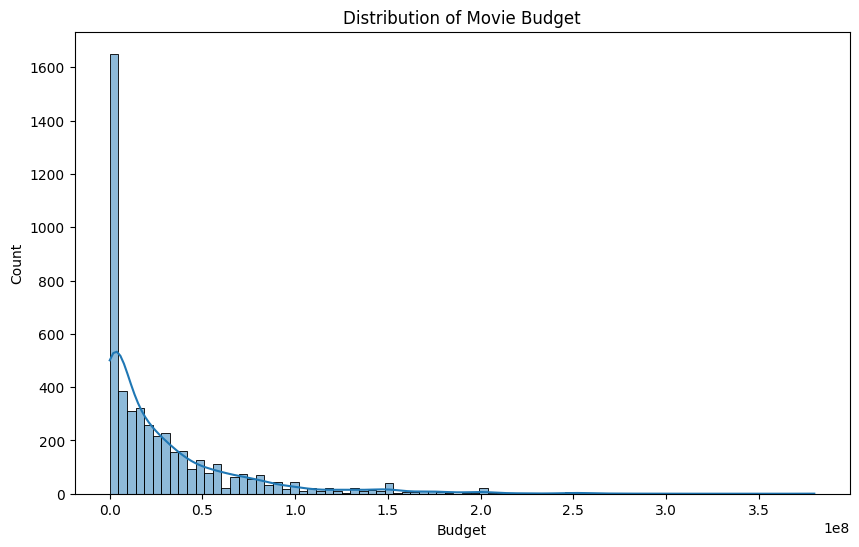

In [ ]:
# Distribution of movie budget
plt.figure(figsize=(10, 6))
sns.histplot(movies['budget'], kde=True)
plt.title('Distribution of Movie Budget')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()

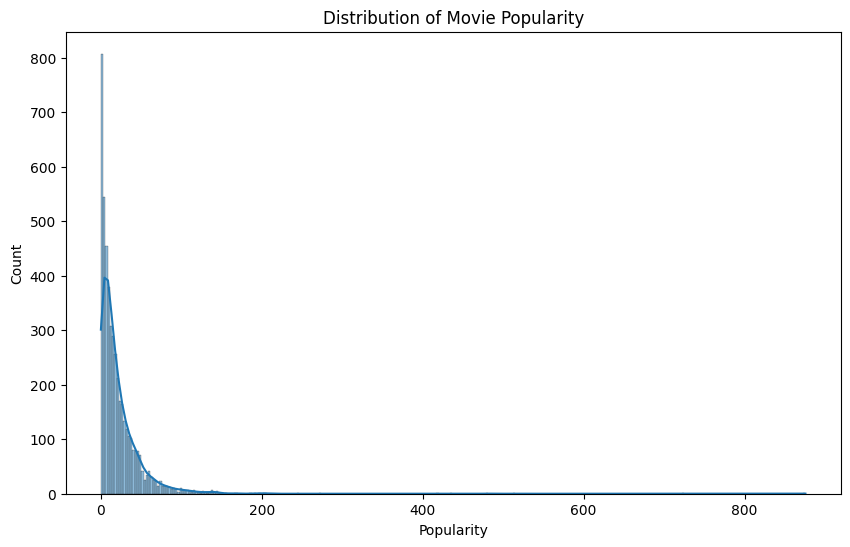

In [ ]:
# Distribution of movie popularity
plt.figure(figsize=(10, 6))
sns.histplot(movies['popularity'], kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1628-4217811991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='original_language', data=movies, order=movies['original_language'].value_counts().nlargest(10).index, palette='viridis')


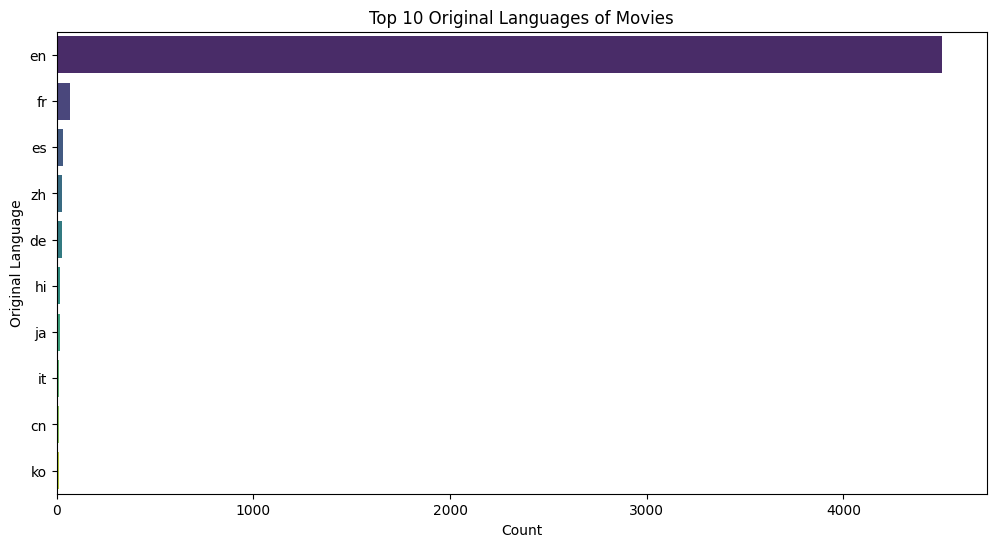

In [ ]:
# Count of movies by original language (top 10)
plt.figure(figsize=(12, 6))
sns.countplot(y='original_language', data=movies, order=movies['original_language'].value_counts().nlargest(10).index, palette='viridis')
plt.title('Top 10 Original Languages of Movies')
plt.xlabel('Count')
plt.ylabel('Original Language')
plt.show()